In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("single_cell_GAM_Pluripotency_features.csv",index_col=0)

In [3]:
df.head()

,Sox18,Tcf19,Hoxa9,Nr2c2,Sox2,Tcf12,Hoxc10,Sox7,Hoxd8,Col23a1,...,Hoxb4,Nr2e1,Hoxa11,Klf14,Gatad2a,Hoxb7,Hoxb1,Sox30,Col22a1,total_number_interactions
F10A2,0,0,0,0,11,0,0,0,10,0,...,0,0,0,0,0,0,0,0,0,10064
F10A3,0,0,2,0,0,0,0,0,0,0,...,0,0,2,1,0,0,0,0,0,12825
F10A4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,21,8343
F10A5,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,17,0,6072
F10A6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1170


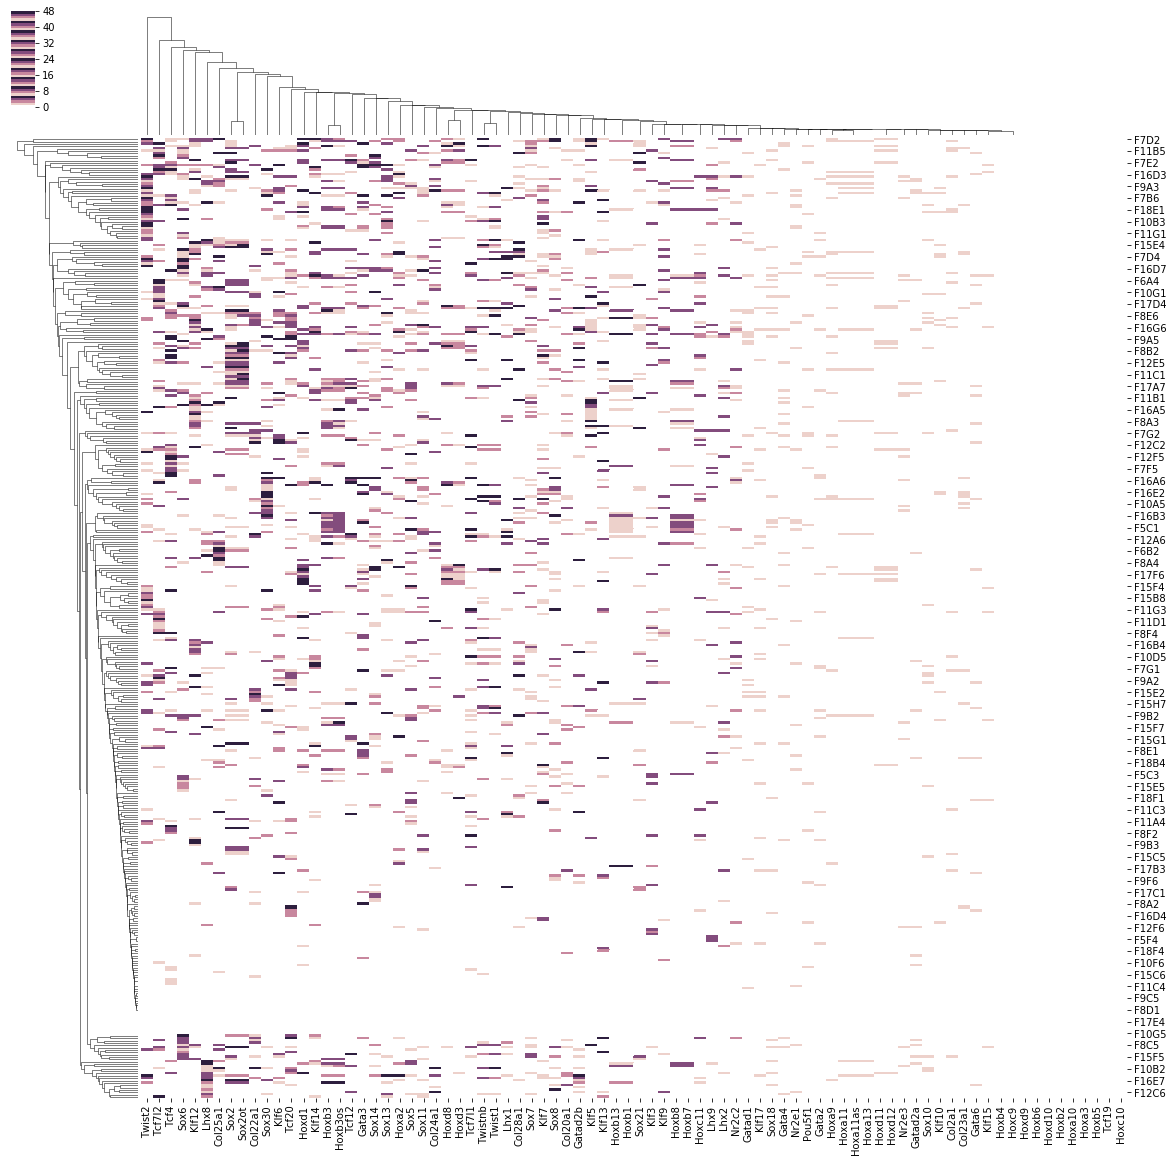

In [29]:
from matplotlib.colors import LinearSegmentedColormap,ListedColormap
myColors = sns.cubehelix_palette(4)
my_new_colors = [[1.0,1.0,1.0]]*1+myColors*10
cmap = LinearSegmentedColormap.from_list('Custom', my_new_colors, len(my_new_colors))
sns.clustermap(df[df.columns[:-1]],figsize=(20,20),cmap=cmap)

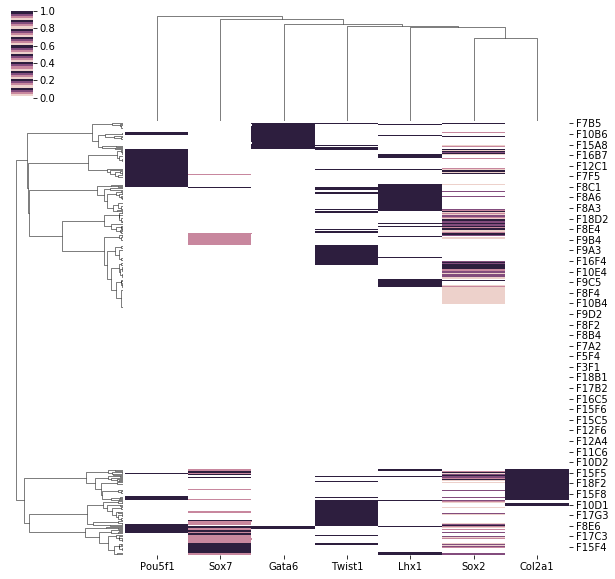

In [37]:
from matplotlib.colors import LinearSegmentedColormap,ListedColormap
myColors = sns.cubehelix_palette(4)
my_new_colors = [[1.0,1.0,1.0]]*1+myColors*10
cmap = LinearSegmentedColormap.from_list('Custom', my_new_colors, len(my_new_colors))
sns.clustermap(df[['Sox2','Pou5f1','Sox7','Gata6','Twist1','Col2a1','Lhx1']],cmap=cmap,method="ward",standard_scale=1)

In [15]:
def discrete_cmap(N, base_cmap=None):
    """Create an N-bin discrete colormap from the specified input map"""

    # Note that if base_cmap is a string or None, you can simply do
    #    return plt.cm.get_cmap(base_cmap, N)
    # The following works for string, None, or a colormap instance:

    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)


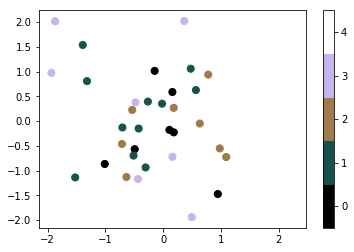

In [17]:
import numpy as np
N = 5

x = np.random.randn(40)
y = np.random.randn(40)
c = np.random.randint(N, size=40)

# Edit: don't use the default ('jet') because it makes @mwaskom mad...
plt.scatter(x, y, c=c, s=50, cmap=discrete_cmap(N, 'cubehelix'))
plt.colorbar(ticks=range(N))
plt.clim(-0.5, N - 0.5)

In [18]:
base = plt.cm.get_cmap(None)
N=5
color_list = base(np.linspace(0, 1, N))
cmap_name = base.name + str(N)

In [21]:
color_list.shape

(5, 4)

In [41]:
subdf = df[df.total_number_interactions >= 5000]

In [42]:
subdf.shape

(293, 83)

In [44]:
subdf[subdf[['Sox2','Pou5f1','Sox7','Gata6','Twist1','Col2a1','Lhx1']].sum(axis=1) > 0].shape

(215, 83)

In [40]:
df[['Sox2','Pou5f1','Sox7','Gata6','Twist1','Col2a1','Lhx1']].sum(axis=1) > 0

F10A2     True
F10A3    False
F10A4    False
F10A5     True
F10A6    False
F10B1    False
F10B2     True
F10B3     True
F10B4     True
F10B5     True
F10B6     True
F10C1     True
F10C2    False
F10C3     True
F10C4    False
F10C6     True
F10D1     True
F10D2    False
F10D3     True
F10D5     True
F10D6     True
F10E1    False
F10E2     True
F10E3     True
F10E4     True
F10E5     True
F10E6     True
F10F1     True
F10F2     True
F10F3    False
         ...  
F9B2      True
F9B3     False
F9B4      True
F9B5      True
F9B6     False
F9C1     False
F9C2     False
F9C4     False
F9C5      True
F9D1     False
F9D2     False
F9D3      True
F9D5     False
F9D6     False
F9E2      True
F9E3      True
F9E4     False
F9E5     False
F9E6      True
F9F1     False
F9F2      True
F9F3      True
F9F4      True
F9F5      True
F9F6     False
F9G1     False
F9G2      True
F9G3     False
F9G4      True
F9G5      True
Length: 408, dtype: bool